In [17]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import PillowWriter

In this analytical mechanics problem we have a torus of radius a and mass M, and a pearl of massa m which can slide freely and without friction around the torus. The torus is spinning about a vertical axis at an angular speed $\dot{\phi}$, and the pearl has a velocity component $a$$\dot{\theta}$  because it is sliding around the torus, and a component $a$$sin(\theta)$$\dot{\phi}$ because the torus is spinning. The system is shown in the figure below:
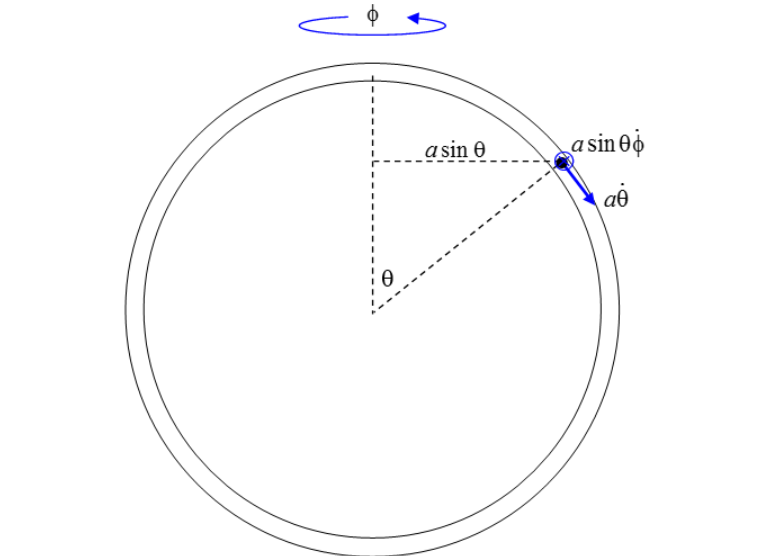



In [18]:
t, a, m, M, g = smp.symbols('t a m M g')
theta, phi = smp.symbols(r'\theta \phi', cls=smp.Function)

Define $\phi(t)$, $\dot{\phi}(t)$, $\ddot{\phi}(t)$, $\theta(t)$, $\dot{\theta}(t)$ and $\ddot{\theta}(t)$:

In [19]:
theta = theta(t)
phi = phi(t)
theta_d = smp.diff(theta, t)
theta_dd = smp.diff(theta_d, t)
phi_d = smp.diff(phi, t)
phi_dd = smp.diff(phi_d, t)

The kinetic energy T of the system is the sum of the translational kinetic energy $(T_1)$ of the pearl and the rotational kinetic energy $(T_2)$ of the torus and we refer the potential energy $(V)$ to the centre of the torus:

In [20]:
T1 = smp.Rational(1, 2)*m*(a**2)*(smp.diff(theta, t)**2 + (smp.sin(theta)**2)*smp.diff(phi, t)**2) #translational kinetic energy
T2 = smp.Rational(1, 2)*smp.Rational(1, 2)*M*(a**2)*(smp.diff(phi, t)**2) #rotational kinetic energy
V = m*g*a*smp.cos(theta) #potential energy
T = T1 + T2 #total kinectic energy

Instead of forces, Lagrangian mechanics uses the energies in the system. The central quantity of Lagrangian mechanics is the 
Lagrangian, a function which summarizes the dynamics of the entire system. Overall, the Lagrangian has units of energy, 
but no single expression for all physical systems. Any function which generates the correct equations of motion, 
in agreement with physical laws, can be taken as a Lagrangian. It is nevertheless possible to construct general expressions 
for large classes of applications. The non-relativistic Lagrangian for a system of particles can be defined by $L = T - V$ and the Lagrange's equations are defined by the expressions:

$\Large\frac{\partial  L}{\partial \theta}-\frac{\mathrm{d} }{\mathrm{d} t}\frac{\partial  L}{\partial \dot{\theta}} = 0$

$\Large\frac{\partial  L}{\partial \phi}-\frac{\mathrm{d} }{\mathrm{d} t}\frac{\partial  L}{\partial \dot{\phi}} = 0$


In [21]:
L = T - V

In [22]:
L 

M*a**2*Derivative(\phi(t), t)**2/4 + a**2*m*(sin(\theta(t))**2*Derivative(\phi(t), t)**2 + Derivative(\theta(t), t)**2)/2 - a*g*m*cos(\theta(t))

In [23]:
LE1 = smp.diff(L, theta) - smp.diff(smp.diff(L, theta_d), t).simplify() #first Lagrange's equation
LE2 = smp.diff(L, phi) - smp.diff(smp.diff(L, phi_d), t).simplify() #second Lagrange's equation

In [24]:
LE1

a**2*m*sin(\theta(t))*cos(\theta(t))*Derivative(\phi(t), t)**2 - a**2*m*Derivative(\theta(t), (t, 2)) + a*g*m*sin(\theta(t))

In [25]:
LE2

-a**2*(M*Derivative(\phi(t), (t, 2))/2 + m*sin(\theta(t))**2*Derivative(\phi(t), (t, 2)) + m*sin(2*\theta(t))*Derivative(\phi(t), t)*Derivative(\theta(t), t))

Now to solve Lagrange's equations we need to equal those equations LE1 and LE2 to 0, and We solve these equations (which are linear in $\dot\{theta}
 and 
) for 
 and 
.

In [26]:
sols = smp.solve([LE1, LE2], (theta_dd, phi_dd),
                simplify=False, rational=False)

In [27]:
dz1dt_f = smp.lambdify((t,a,m,M,g,theta,phi,theta_d,phi_d), sols[theta_dd])
dz2dt_f = smp.lambdify((t,a,m,M,g,theta,phi,theta_d,phi_d), sols[phi_dd])
dthe1dt_f = smp.lambdify(theta_d, theta_d)
dthe2dt_f = smp.lambdify(phi_d, phi_d)

In [29]:
def dSdt(S,t,a,m,M,g):
    theta, z1, phi, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t,a,m,M,g,theta,phi,z1,z2),
        dthe2dt_f(z2),
        dz2dt_f(t,a,m,M,g,theta,phi,z1,z2),
    ]

In [30]:
t = np.linspace(0, 100, 1001) # s
g = 9.81 #m/s^2
m=2
M=10
a=5
ans = odeint(dSdt, y0=[1, -1, -1, 1], t=t, args=(a,m,M,g))

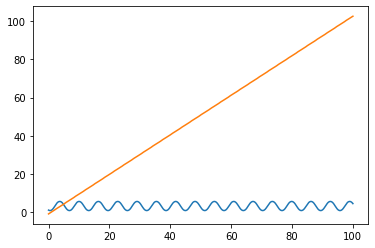

In [31]:
theta = ans.T[0]
phi = ans.T[2]
plt.plot(t, theta)
plt.plot(t, phi)